## Plotting fluxes and rates, January 2017 (Sikuliaq)

###  - Station P1 onshore (Station 15)
###  - Station P2 offshore (Station 16)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [46]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2017-fluxes.xlsx", index_col = 'sample id')

etnp_2017.head()

,Station,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),d15N vs Air N2 (permil),d13C vs VPDB (permil)
sample id,,,,,,,,,,,,
1-1_60m_+p,P1,60,60,cone,88.651326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2-2_50m_+p,P1,50,50,cone,190.876791,NaN,NaN,329.466919,329.466919,NaN,NaN,NaN
2-2_50m_top,P1,50,50,cone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-3_150m_+p,P1,150,150,net,159.375771,6.801011,53.605571,1380.747967,1380.747967,NaN,NaN,NaN
3-3_150m_top,P1,150,150,net,NaN,6.330467,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P2')]
P1_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P1')]

P2_2017.head()

,Station,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),d15N vs Air N2 (permil),d13C vs VPDB (permil)
sample id,,,,,,,,,,,,
1-12_73m_+p,P2,73,73,cone,81.787511,18.178697,103.064253,NaN,NaN,NaN,21.7209,-22.9725
1-12_148m_+p,P2,148,148,cone,90.820391,19.770272,66.997775,NaN,NaN,24.0,51.2103,-25.9195
2-14_100m_+p,P2,100,100,cone,138.442644,NaN,NaN,314.713044,314.713044,15.0,NaN,NaN
2-14_100m_top,P2,100,100,cone,NaN,10.613096,37.576112,NaN,NaN,NaN,36.8276,-26.0099
2-14_150m_+p,P2,150,150,net,70.654491,NaN,NaN,1920.245297,1920.245297,16.0,NaN,NaN


In [48]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [49]:
import ctd


castP2 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-043avg.cnv")
downP2, upP2 = castP2.split()

# rename the 'depSMignore' column 'Depth'
# delete the scan, nbin, and flag columns

del downP2['scan']
del downP2['nbin']
del downP2['flag']


downP2.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/skq201617s-P2-043avg.csv")

downP2.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
Pressure [dbar],,,,,,,,,,,,,,,,
3.0,2.982,16.58962,-106.92288,28.7428,28.7419,28.7421,33.5449,33.5546,1021.0701,21.0573,0.20173,189.660,196.33368,0.1606,96.0634,1.000000e-12
4.0,3.976,16.58962,-106.92289,28.7431,28.7431,28.7421,33.5453,33.5546,1021.0747,21.0575,0.22492,189.627,196.33235,0.1660,95.9354,1.000000e-12
5.0,4.970,16.58961,-106.92288,28.7435,28.7432,28.7424,33.5454,33.5548,1021.0788,21.0574,0.20475,189.639,196.33086,0.1615,96.0412,1.000000e-12
6.0,5.964,16.58962,-106.92288,28.7433,28.7429,28.7419,33.5455,33.5549,1021.0833,21.0576,0.20142,189.704,196.33141,0.1659,95.9365,1.000000e-12
7.0,6.958,16.58962,-106.92288,28.7438,28.7434,28.7421,33.5454,33.5547,1021.0873,21.0573,0.19712,190.067,196.33012,0.1638,95.9881,1.000000e-12


In [50]:
# Merge station flux and station cast dataframes on their indices

P2_join = P2_2017.merge(downP2,on='Pressure [dbar]')

# Save to csv and fill empty cells

P2_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/SKQ_2017_P2_cast_trap_join.csv", na_rep='NULL')

P2_join.head()

,Station,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),...,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
0,P2,73,73,cone,81.787511,18.178697,103.064253,NaN,NaN,NaN,...,34.6423,34.6487,1025.2820,24.9614,0.38130,8.217,233.87545,0.1490,96.3430,1.000000e-12
1,P2,148,148,cone,90.820391,19.770272,66.997775,NaN,NaN,24.0,...,34.8053,34.8129,1026.9442,26.2828,0.10563,0.405,259.33631,0.1404,96.5510,1.000000e-12
2,P2,100,100,cone,138.442644,NaN,NaN,314.713044,314.713044,15.0,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
3,P2,100,100,cone,NaN,10.613096,37.576112,NaN,NaN,NaN,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
4,P2,100,100,cone,111.165761,NaN,NaN,NaN,NaN,29.0,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12


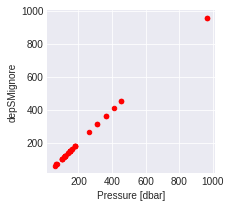

In [51]:
# Sanity check - does the Pressure (depth from trap file) match the Depth (from cast file)?

fig, ax = plt.subplots(figsize=(3, 3))

P2_join.plot(ax = ax, kind='scatter', x='Pressure [dbar]', y='depSMignore', c='Red');

In [52]:
import ctd


castP1 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-030avg.cnv")
downP1, upP1 = castP1.split()

del downP1['scan']
del downP1['nbin']
del downP1['flag']

# write to csv for use in making flux-density plots

downP1.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/skq201617s-P1-030avg.csv")

downP1.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
Pressure [dbar],,,,,,,,,,,,,,,,,,,
3.0,2.982,20.30536,-106.21944,26.1551,26.1540,26.1544,34.6634,34.6735,1022.7439,22.7310,0.22573,198.250,203.28815,0.1769,95.6729,1.4176,2.2625,-2.040,1.000000e-12
4.0,3.975,20.30536,-106.21944,26.1509,26.1514,26.1500,34.6637,34.6739,1022.7498,22.7326,0.22553,198.699,203.30163,0.1762,95.6894,1.4176,2.2628,-2.038,1.000000e-12
5.0,4.969,20.30536,-106.21944,26.1547,26.1549,26.1535,34.6636,34.6738,1022.7529,22.7313,0.21799,198.879,203.28918,0.1757,95.7028,1.4177,2.2630,-2.038,1.000000e-12
6.0,5.963,20.30536,-106.21944,26.1518,26.1508,26.1505,34.6635,34.6742,1022.7579,22.7321,0.23032,198.809,203.29888,0.1738,95.7487,1.4178,2.2630,-2.038,1.000000e-12
7.0,6.957,20.30536,-106.21944,26.1519,26.1492,26.1503,34.6639,34.6743,1022.7626,22.7324,0.23932,199.086,203.29810,0.1766,95.6814,1.4177,2.2629,-2.038,1.000000e-12


In [53]:
# Merge station flux and station cast dataframes on their indices

P1_join = P1_2017.merge(downP1,on='Pressure [dbar]')

# Save to csv and fill empty cells

P1_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/SKQ_2017_P1_cast_trap_join.csv", na_rep='NULL')

P1_join.head(20)

,Station,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),...,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
0,P1,60,60,cone,88.651326,NaN,NaN,NaN,NaN,NaN,...,25.2467,0.405400,28.237,240.40529,0.1338,96.7096,3.0942,1.6025,-2.332,1.000000e-12
1,P1,50,50,cone,190.876791,NaN,NaN,329.466919,329.466919,NaN,...,24.8633,0.611640,56.284,233.62860,0.1557,96.1819,2.6220,1.7336,-2.281,1.000000e-12
2,P1,50,50,cone,NaN,NaN,NaN,NaN,NaN,NaN,...,24.8633,0.611640,56.284,233.62860,0.1557,96.1819,2.6220,1.7336,-2.281,1.000000e-12
3,P1,150,150,net,159.375771,6.801011,53.605571,1380.747967,1380.747967,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
4,P1,150,150,net,NaN,6.330467,NaN,NaN,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
5,P1,150,150,cone,132.055748,NaN,NaN,NaN,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
6,P1,150,150,cone,NaN,37.476876,82.129263,NaN,NaN,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
7,P1,100,100,cone,127.943386,NaN,NaN,240.000000,240.000000,NaN,...,26.0562,0.398930,0.663,253.58204,0.1407,96.5422,3.6907,1.3787,-2.423,1.000000e-12
8,P1,100,100,cone,NaN,25.714124,45.629060,952.869565,952.869565,NaN,...,26.0562,0.398930,0.663,253.58204,0.1407,96.5422,3.6907,1.3787,-2.423,1.000000e-12
9,P1,90,90,cone,103.732832,NaN,NaN,NaN,NaN,NaN,...,25.9231,0.550040,0.838,250.83089,0.1490,96.3430,3.6862,1.4313,-2.404,1.000000e-12


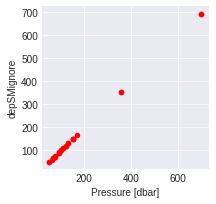

In [54]:
# Sanity check - does the Pressure (depth from trap file) match the Depth (from cast file)?

fig, ax = plt.subplots(figsize=(3, 3))

P1_join.plot(ax = ax, kind='scatter', x='Pressure [dbar]', y='depSMignore', c='Red');

In [55]:
def make_patch_spines_invisible(ax):
    
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

# P2

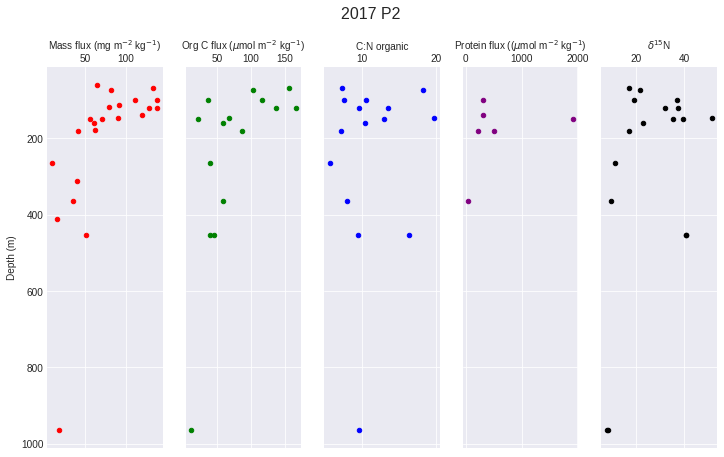

In [56]:
# Five-panel plot with delN15

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(12, 7))

fig2.suptitle('2017 P2', fontsize=16, y = 1.0)

# Mass flux

P2_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# d15N of sinking non incubated sinking particles

P2_2017.plot(ax = ax6, kind='scatter', x='d15N vs Air N2 (permil)', y='Pressure [dbar]', c='Black')
#ax4.plot(fluo,depth,'o-g')
ax6.set_xlabel('$\delta$$^{15}$N')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.yaxis.set_visible(False) # This erases the y ticks
ax6.grid(True)

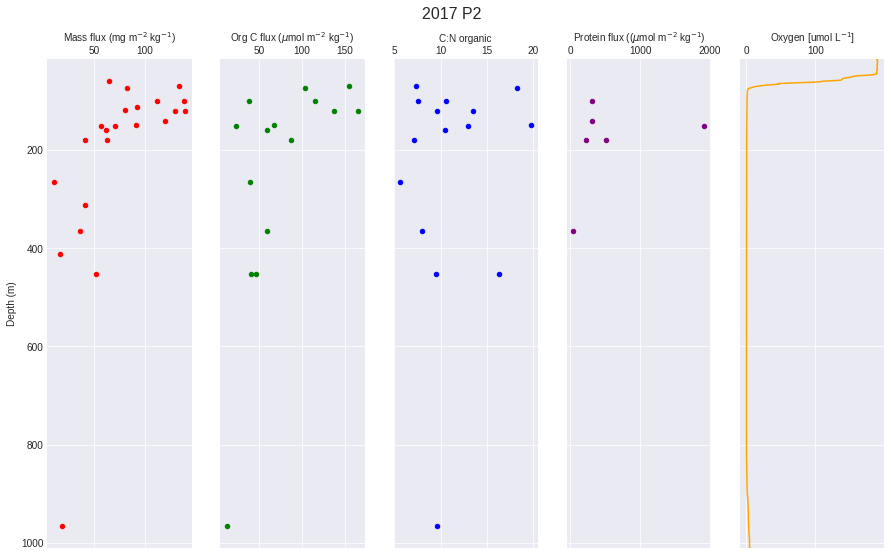

In [85]:
# Five-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2017 P2', fontsize=16, y = 0.96)

# Mass flux

P2_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

downP2.plot(ax = ax6, kind='line', x='sbox0Mm/Kg', y='depSMignore', c='Orange') 
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.get_legend().remove()
ax6.grid(True)

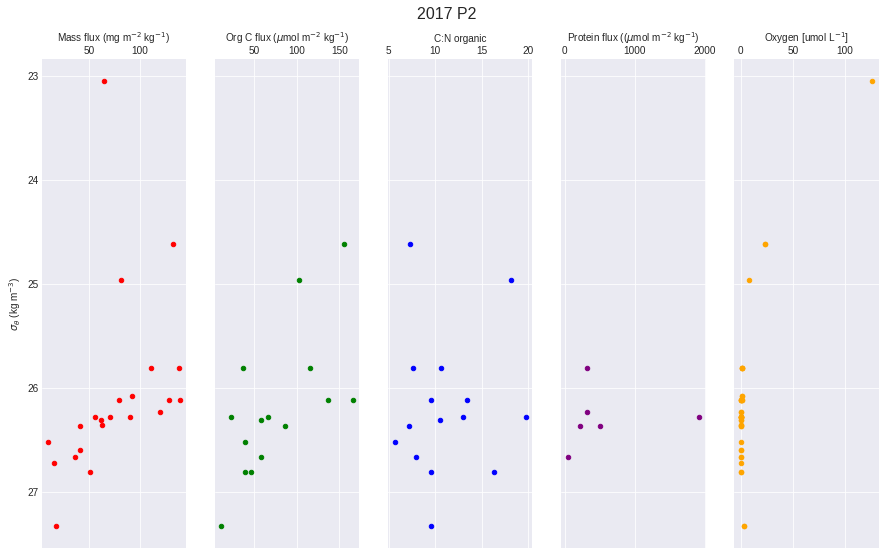

In [91]:
# plot flux with density using the merged cast and trap file

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2017 P2', fontsize=16, y = 0.96)

# Mass flux

P2_join.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y= 'sigma-t00', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_join.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y= 'sigma-t00', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_join.plot(ax = ax4, kind='scatter', x='C:N organic', y= 'sigma-t00', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_join.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y= 'sigma-t00', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

P2_join.plot(ax = ax6, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-t00', c='Orange')
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.get_legend().remove()
ax6.grid(True);

# P1

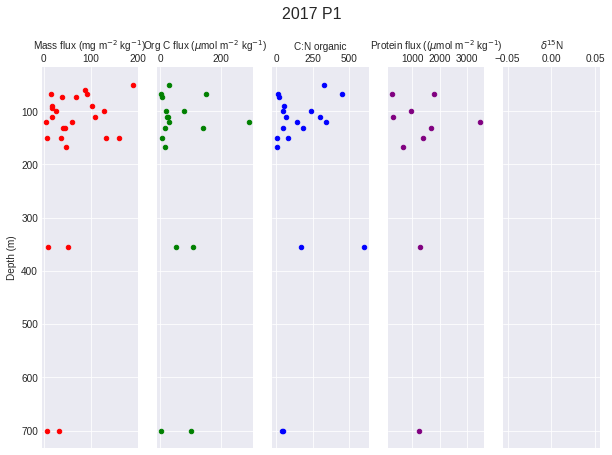

In [17]:
# Five-panel plot with delN15

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(10, 7))

fig2.suptitle('2017 P1', fontsize=16, y = 1.0)

# Mass flux

P1_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# d15N of sinking non incubated sinking particles

P1_2017.plot(ax = ax6, kind='scatter', x='d15N vs Air N2 (permil)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax6.set_xlabel('$\delta$$^{15}$N')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.yaxis.set_visible(False) # This erases the y ticks
ax6.grid(True)

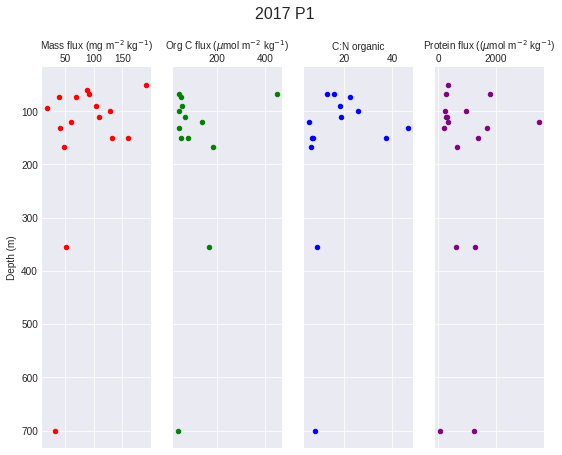

In [88]:
# Four-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(9, 7))

fig2.suptitle('2017 P1', fontsize=16, y = 1.0)

# Mass flux

P1_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

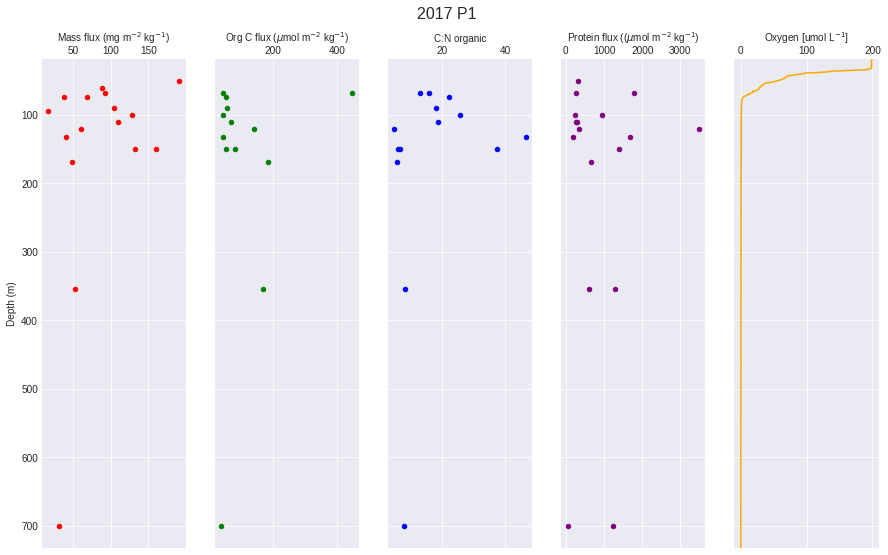

In [89]:
# Five-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2017 P1', fontsize=16, y = 0.96)

# Mass flux

P1_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_2017.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_2017.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

downP1.plot(ax = ax6, kind='line', x='sbox0Mm/Kg', y='depSMignore', c='Orange') 
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.get_legend().remove()
ax6.grid(True)

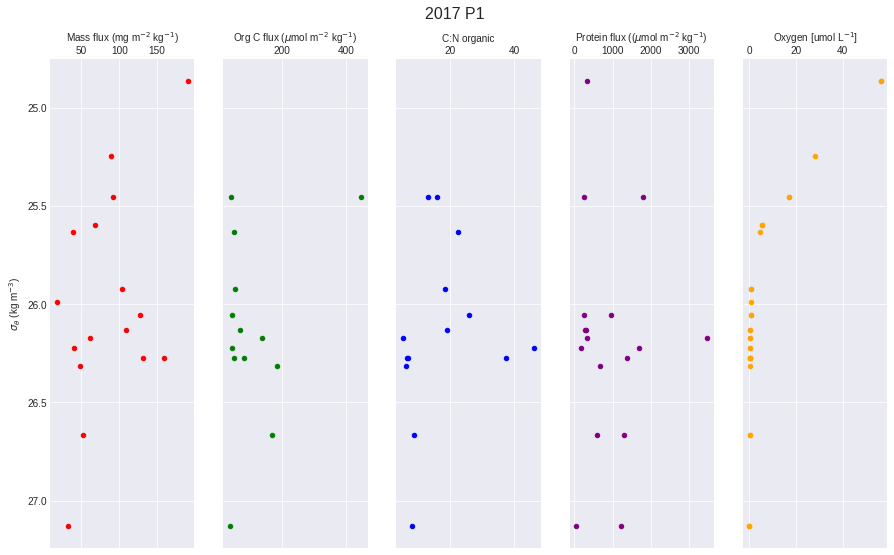

In [92]:
# plot flux with density using the merged cast and trap file

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2017 P1', fontsize=16, y = 0.96)

# Mass flux

P1_join.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y= 'sigma-t00', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_join.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y= 'sigma-t00', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_join.plot(ax = ax4, kind='scatter', x='C:N organic', y= 'sigma-t00', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_join.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y= 'sigma-t00', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

P1_join.plot(ax = ax6, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-t00', c='Orange')
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.get_legend().remove()
ax6.grid(True);